In [1]:
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

from sage.visualization.vistool_pipeline import VisTool
from sage.visualization.visual_utils import plot_vismap, Assembled

This run_pretrains_single function is no longer supported since version=0.2
This run_dataloader function is no longer supported since version=0.2
This run_pretrains_dataloader function is no longer supported since version=0.2


In [2]:
from sage.config import load_config
from sage.training.trainer import MRITrainer

cfg = load_config()
cfg.batch_size = 1
cfg.partial = .05

trainer = MRITrainer(cfg)

Use cuda:0 as a device.
Output from encoder is 128.
Total Number of parameters: 905549
TOTAL TRAIN 57 | VALID 15
MIXED PRECISION:: True


In [3]:
encoder = trainer.models['encoder']
regressor = trainer.models['regressor']
del trainer

import torch
torch.cuda.empty_cache()

In [4]:
model = Assembled(encoder, regressor)

PREFIX = 'G:/My Drive/brain_data/workspace/result/models/20210814-1815/'
SUFFIX = 'ep159_mae6.28.pt'

weight = {
    'encoder': f"{PREFIX}/encoder/{SUFFIX}",
    'regressor': f"{PREFIX}/regressor/{SUFFIX}",
}

In [5]:
gcam = VisTool(cfg, model, cam_type='gcam')

Weights successfully loaded!
Weights successfully loaded!
[true] 22 [pred] 25.240


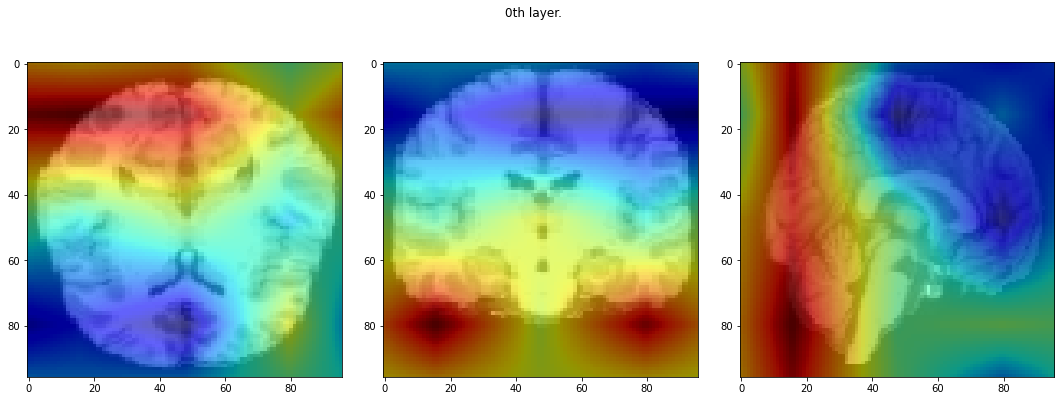

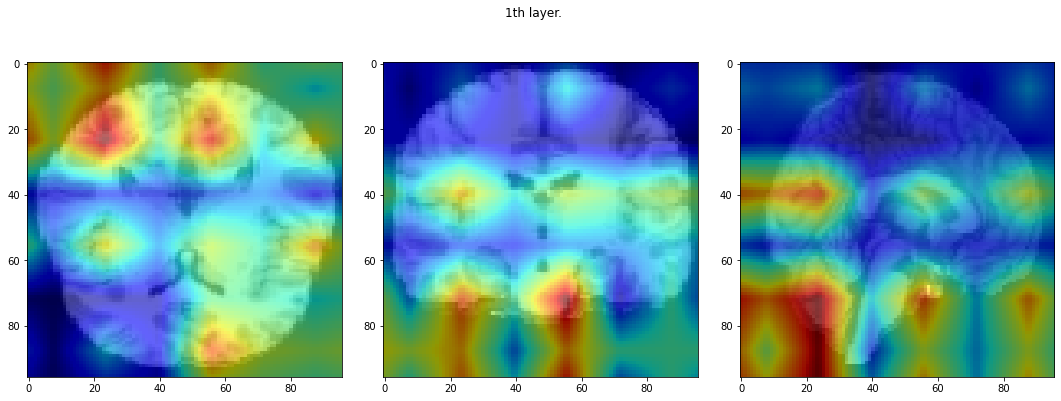

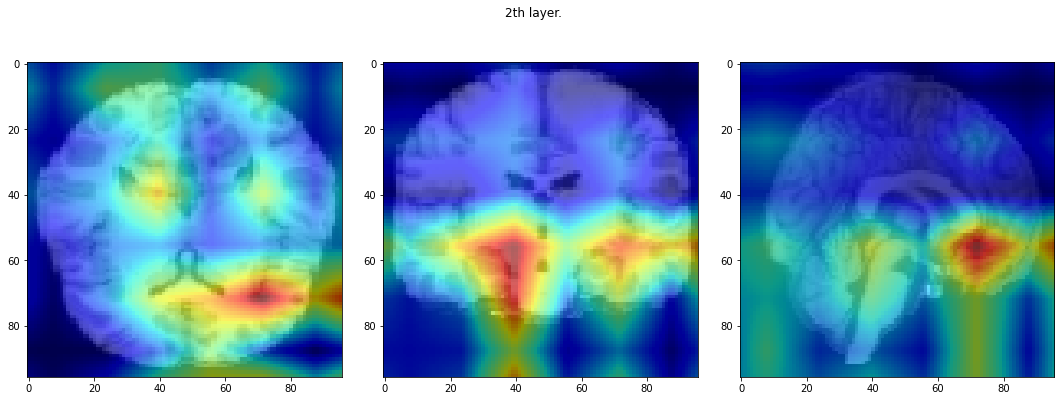

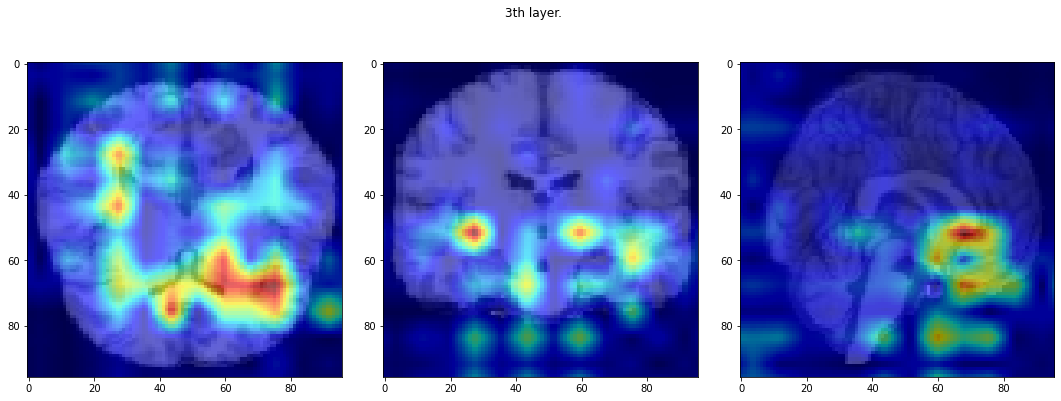

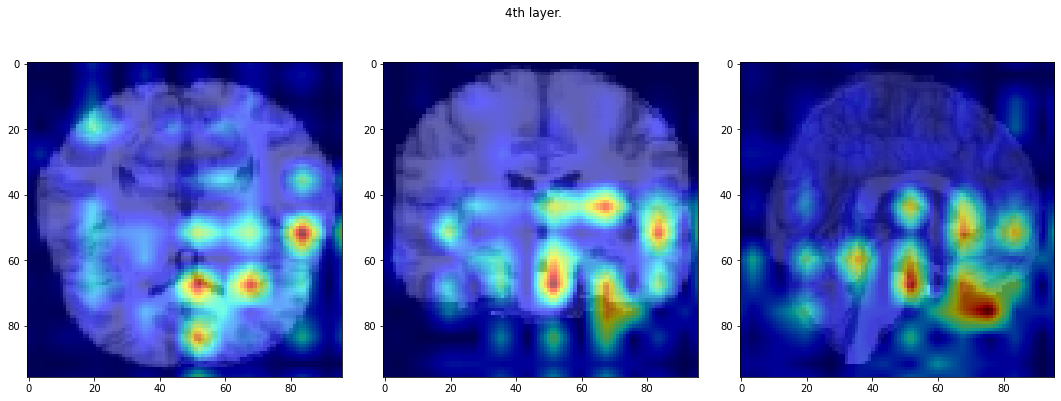

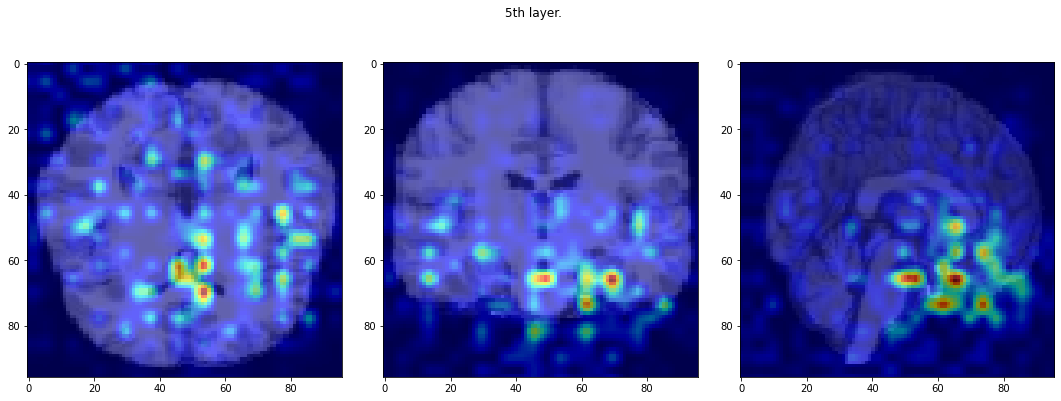

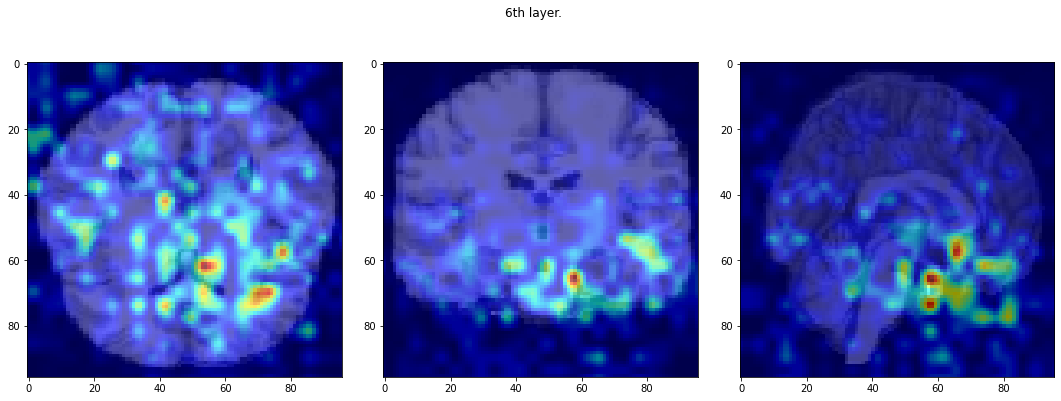

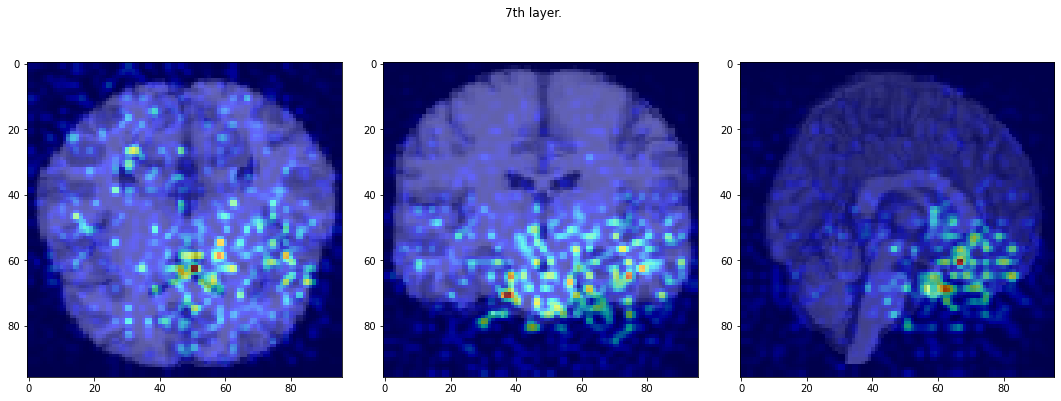

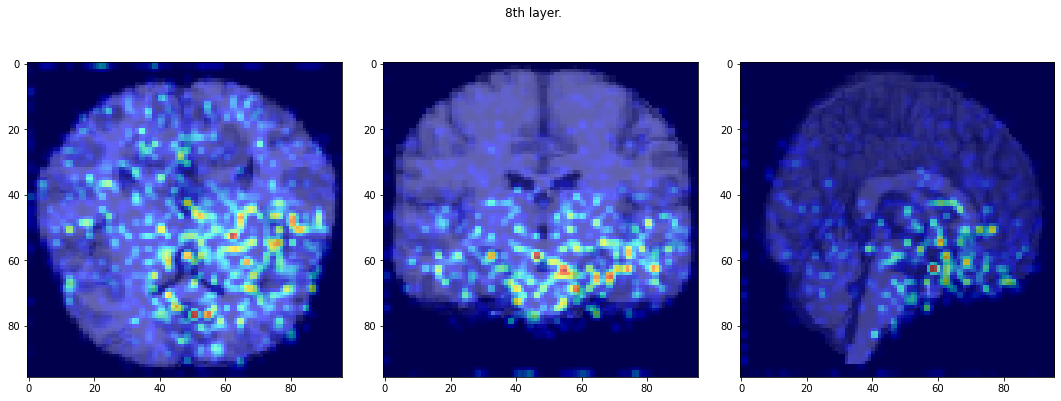

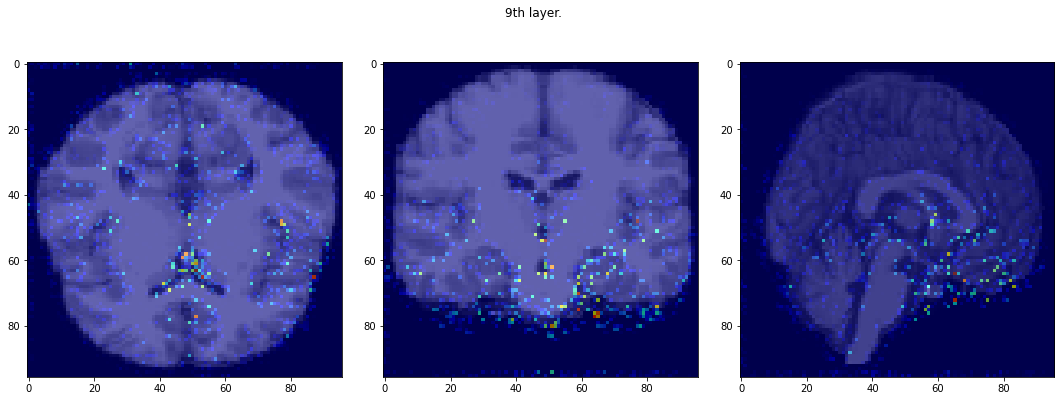

In [6]:
from sage.data.dataloader import get_dataloader

train_dataloader = get_dataloader(cfg, test=False)
valid_dataloader = get_dataloader(cfg, test=True)

batch = next(iter(train_dataloader))
x, y, _ = batch

vismap = gcam(x, y, weight=weight, visualize=True)

Weights successfully loaded!
Weights successfully loaded!
[true] 39 [pred] 0.516
[true] 43 [pred] 0.404
[true] 21 [pred] 0.978
[true] 35 [pred] 0.608
[true] 41 [pred] 0.706
[true] 30 [pred] 0.409
[true] 34 [pred] 0.588
[true] 41 [pred] 0.689
[true] 74 [pred] 1.346
[true] 28 [pred] 0.362
[true] 28 [pred] 0.538
[true] 30 [pred] 0.842
[true] 29 [pred] 0.817
[true] 55 [pred] 0.738
[true] 21 [pred] 0.411


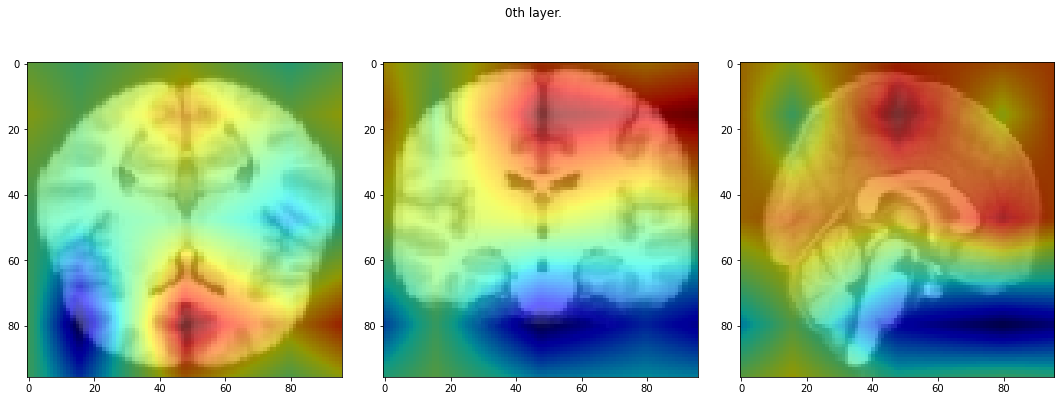

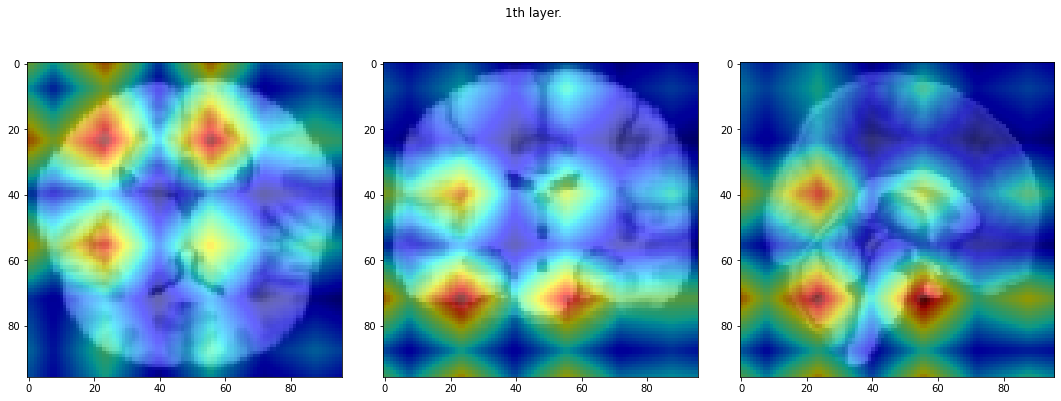

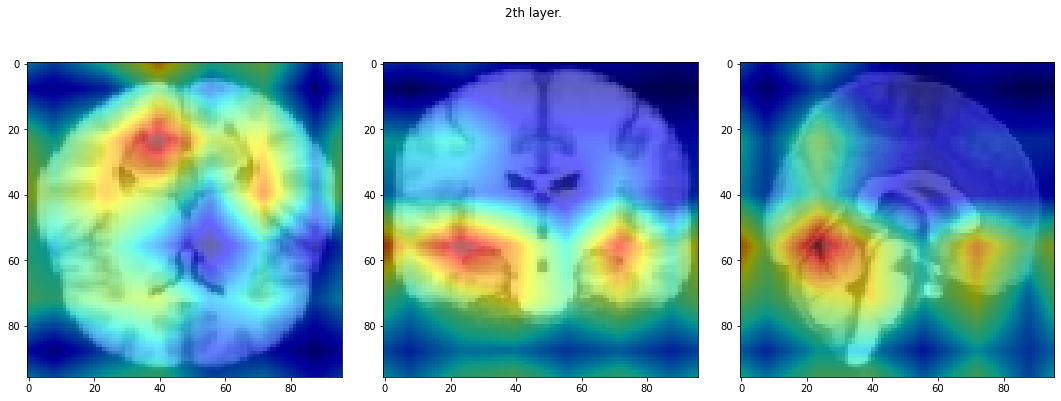

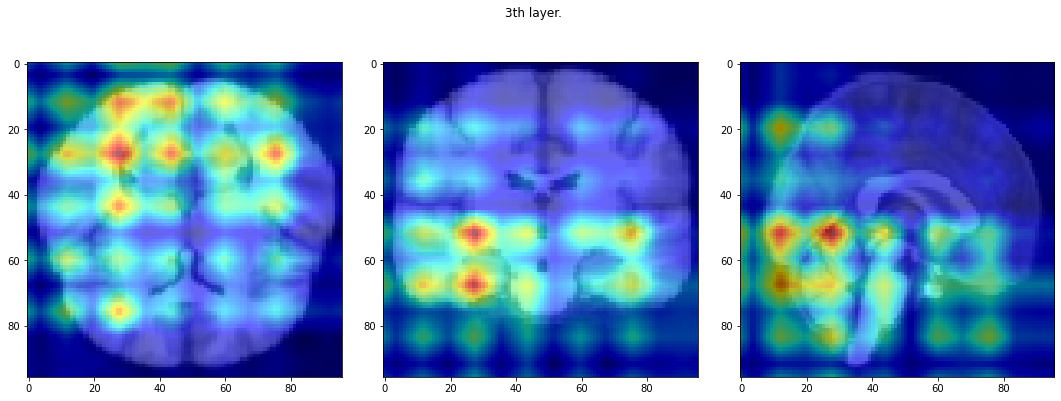

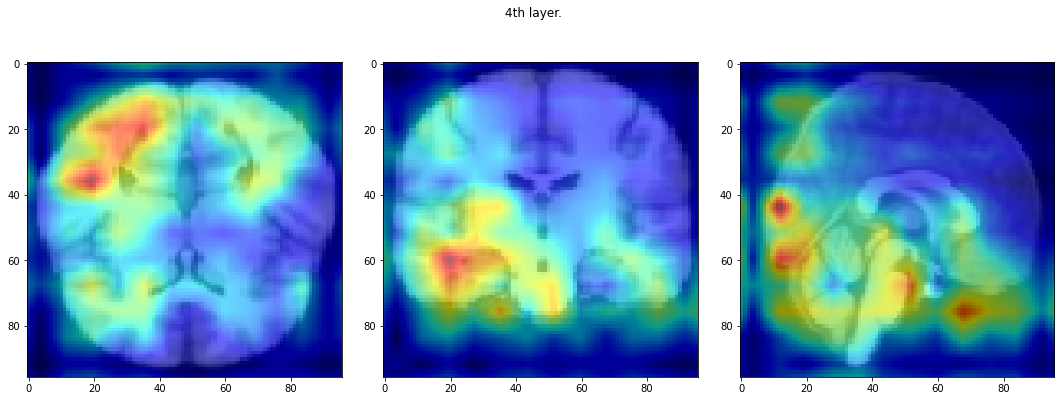

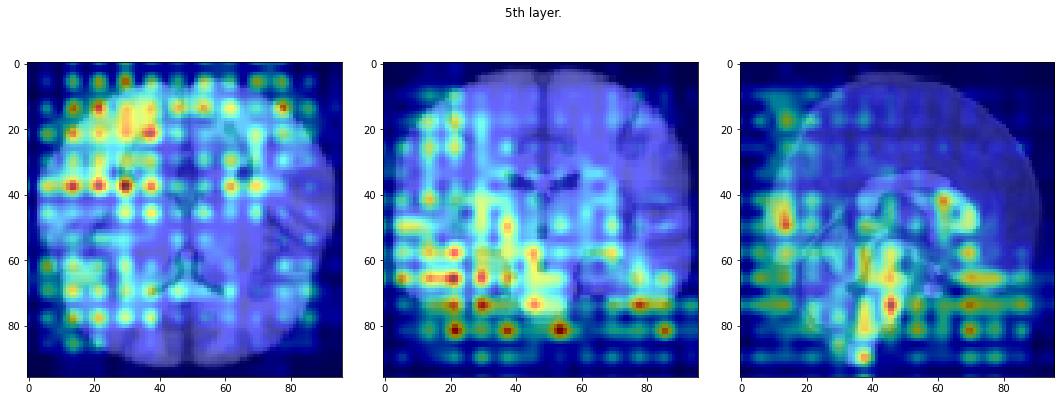

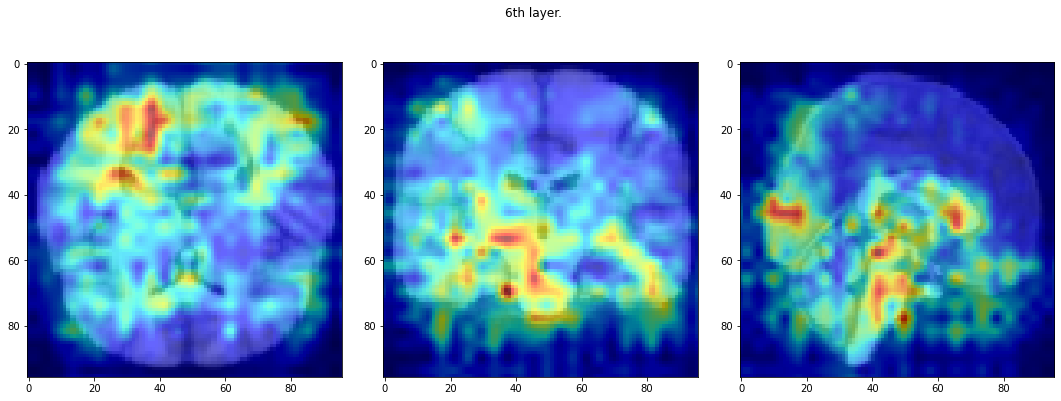

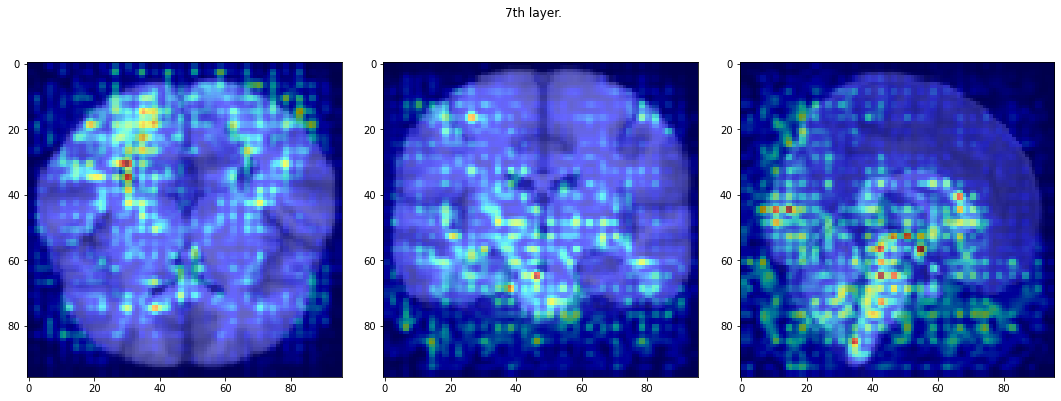

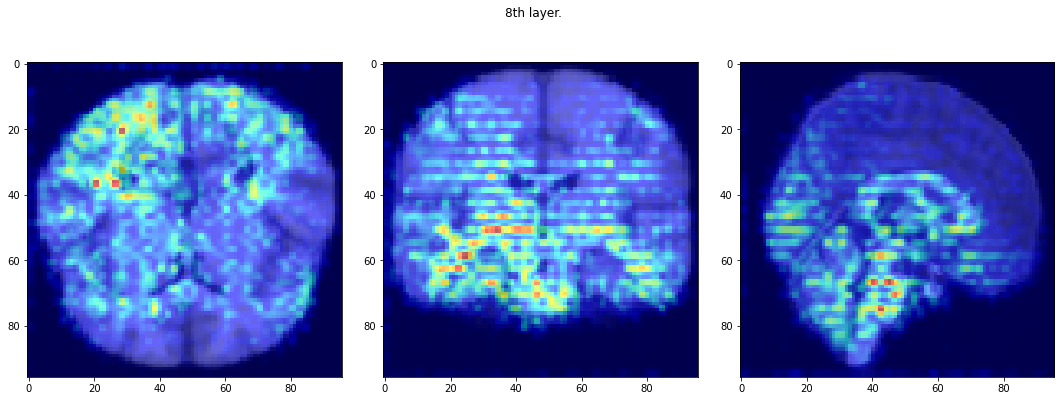

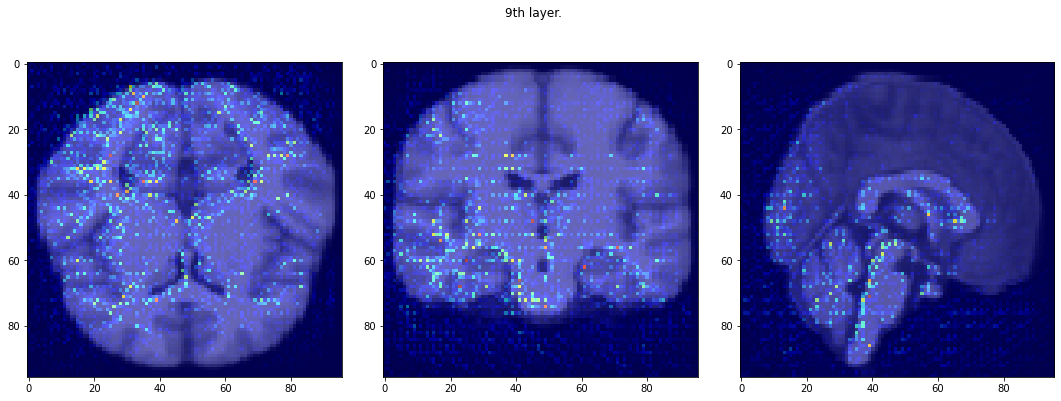

Weights successfully loaded!
Weights successfully loaded!
[true] 39 [pred] 1.701
[true] 43 [pred] 1.361
[true] 21 [pred] 1.616
[true] 35 [pred] 0.703
[true] 41 [pred] 1.832
[true] 30 [pred] 1.472
[true] 34 [pred] 1.791
[true] 41 [pred] 1.604
[true] 74 [pred] 2.767
[true] 28 [pred] 1.136
[true] 28 [pred] 0.898
[true] 30 [pred] 1.119
[true] 29 [pred] 2.087
[true] 55 [pred] 1.820
[true] 21 [pred] 0.887


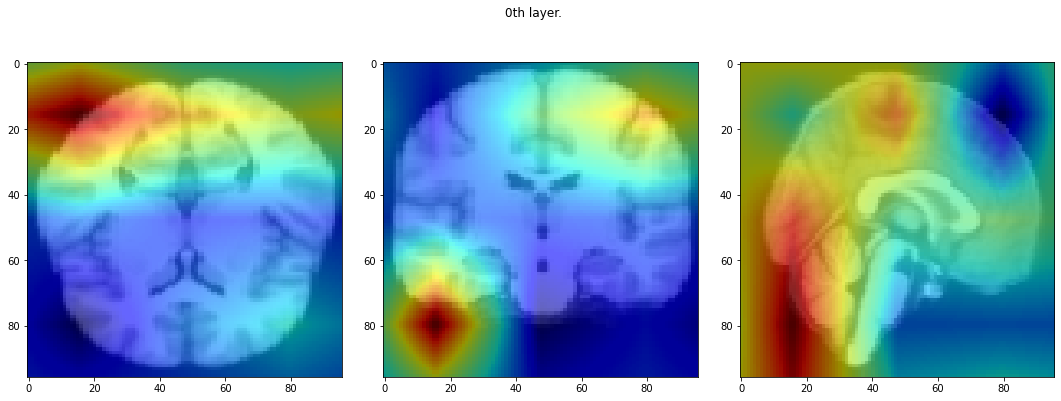

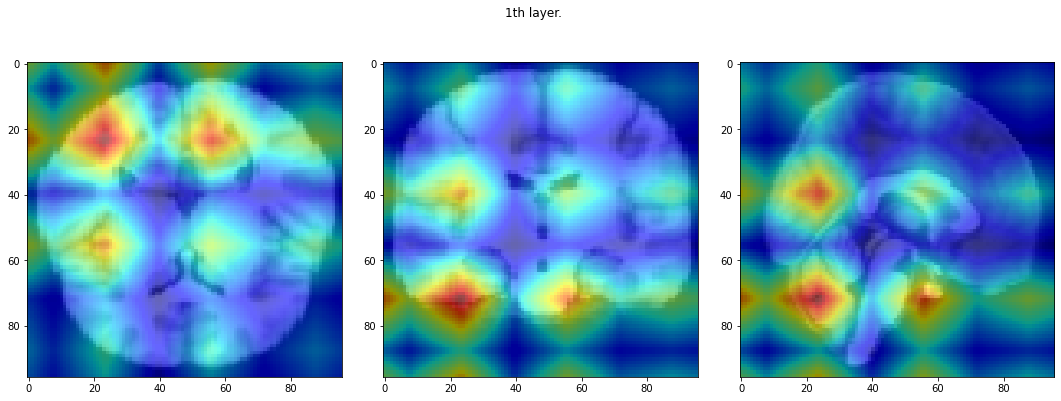

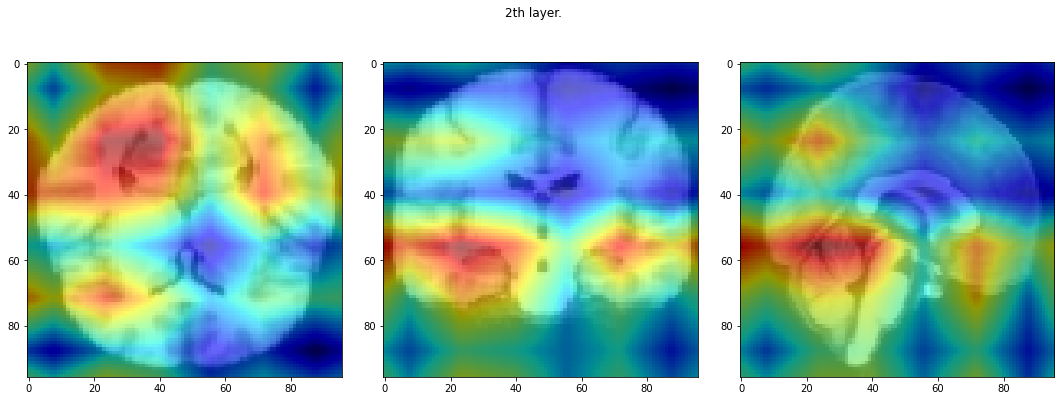

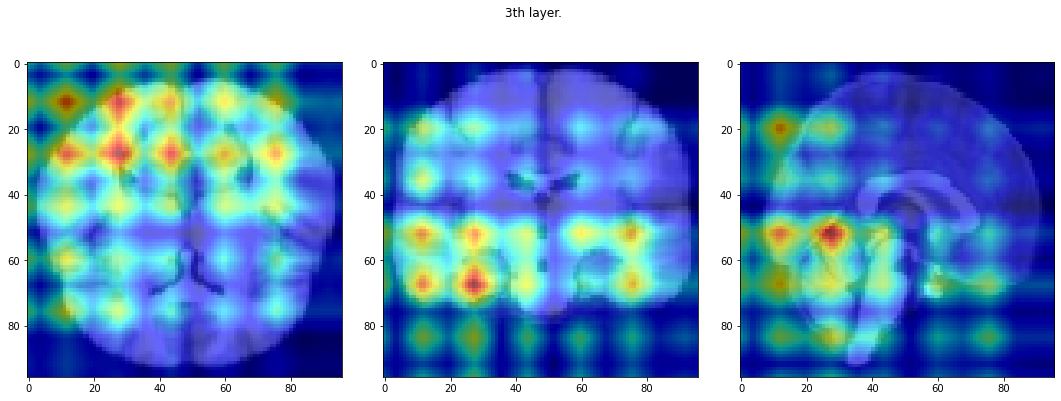

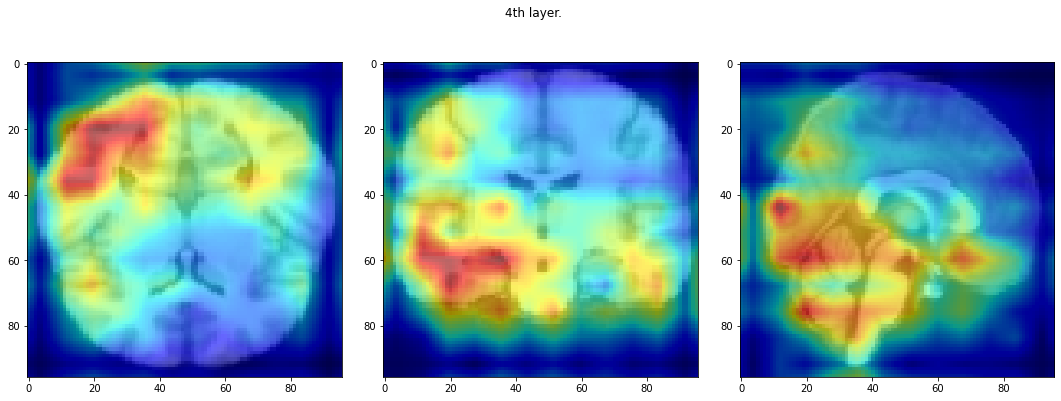

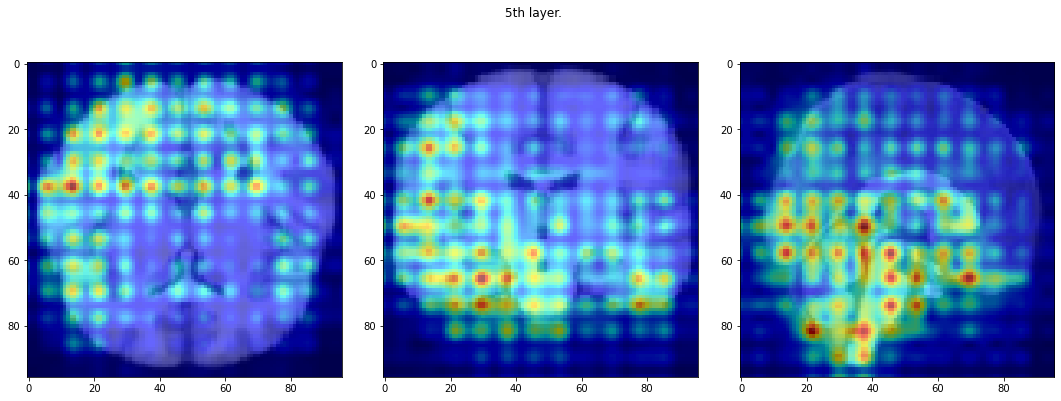

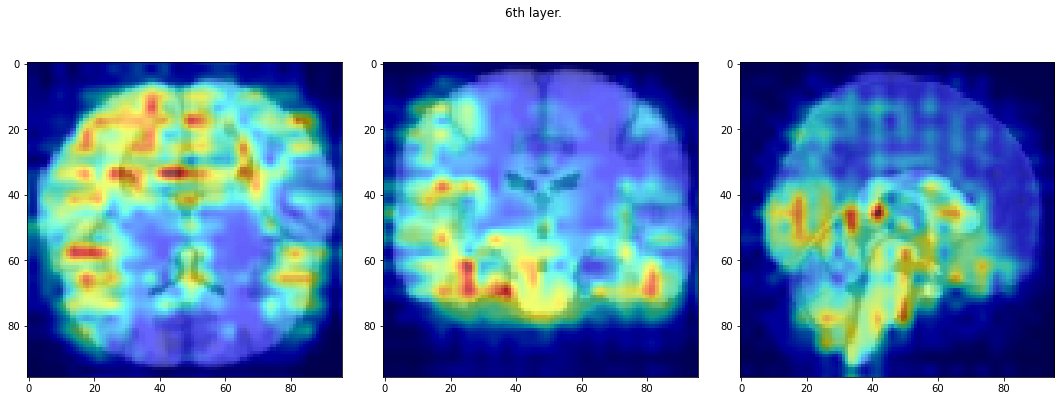

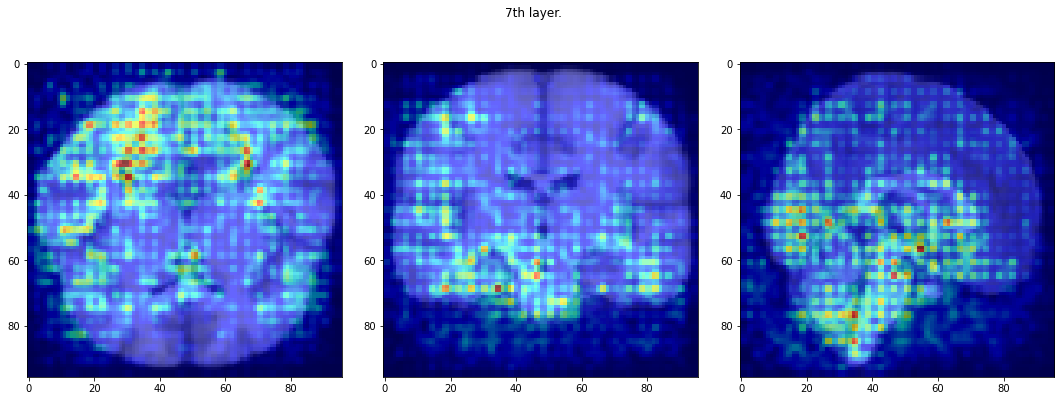

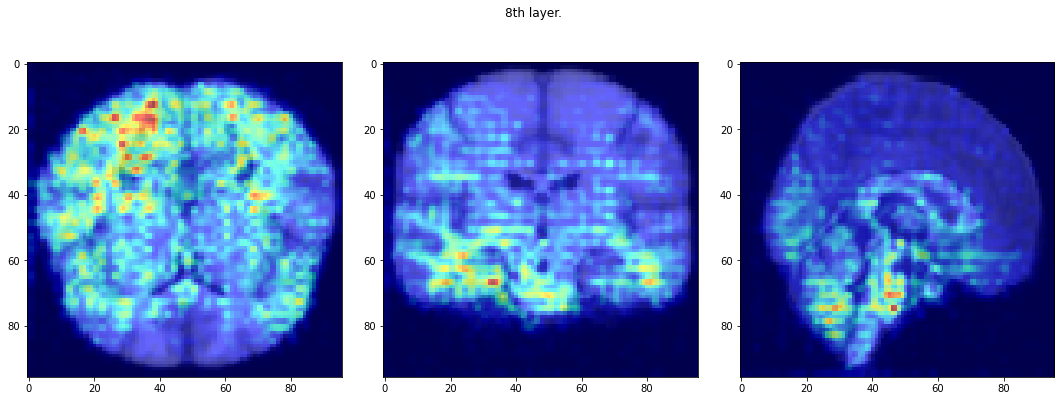

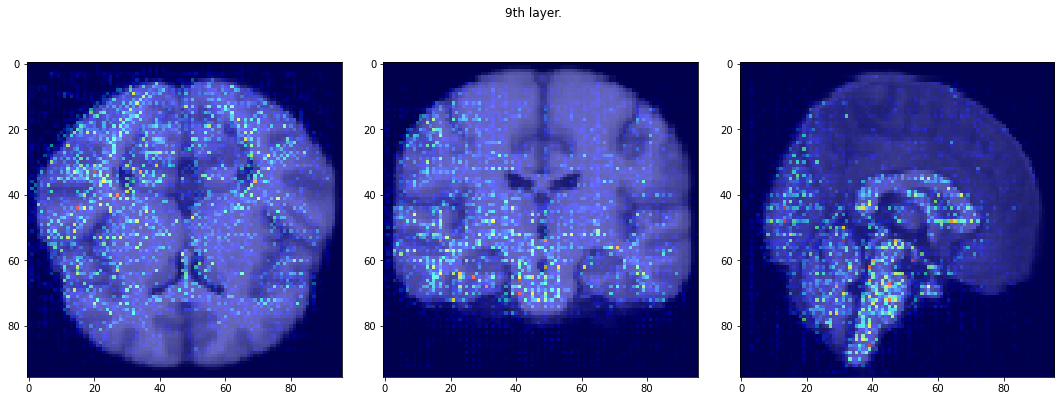

Weights successfully loaded!
Weights successfully loaded!
[true] 39 [pred] 2.298
[true] 43 [pred] 2.453
[true] 21 [pred] 2.615
[true] 35 [pred] 1.109
[true] 41 [pred] 2.050
[true] 30 [pred] 2.219
[true] 34 [pred] 2.643
[true] 41 [pred] 2.202
[true] 74 [pred] 9.748
[true] 28 [pred] 1.667
[true] 28 [pred] 2.492
[true] 30 [pred] 1.953
[true] 29 [pred] 8.475
[true] 55 [pred] 2.272
[true] 21 [pred] 1.795


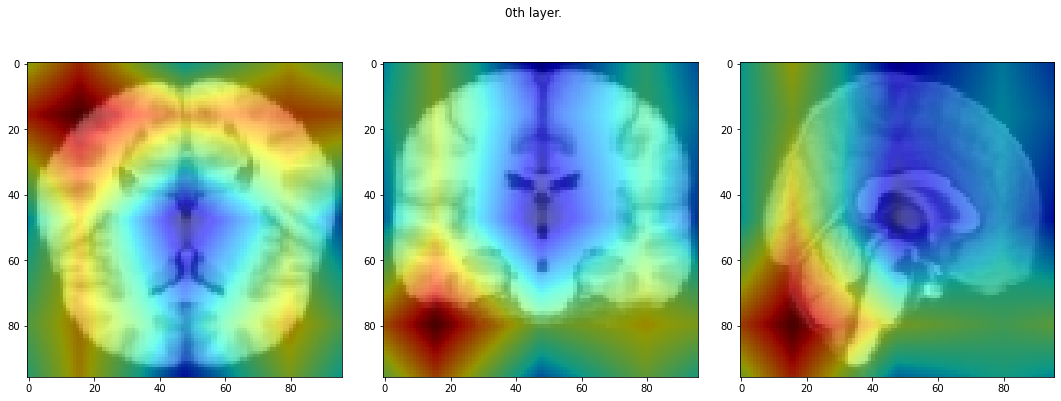

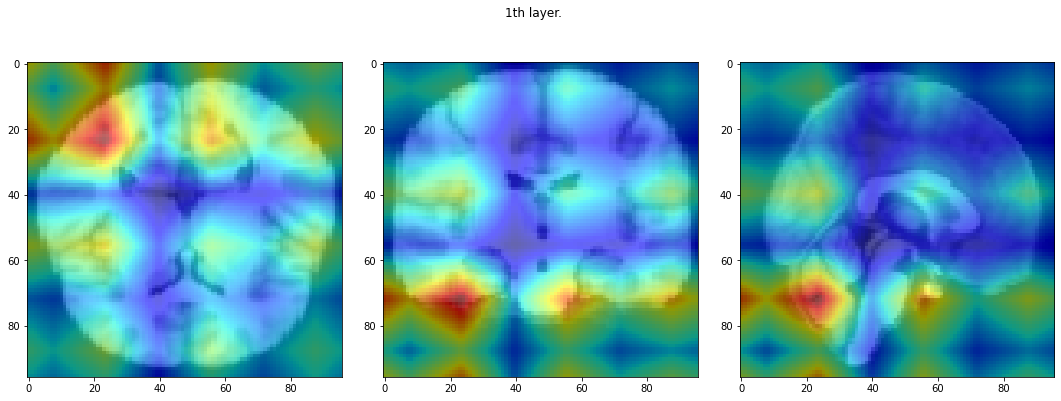

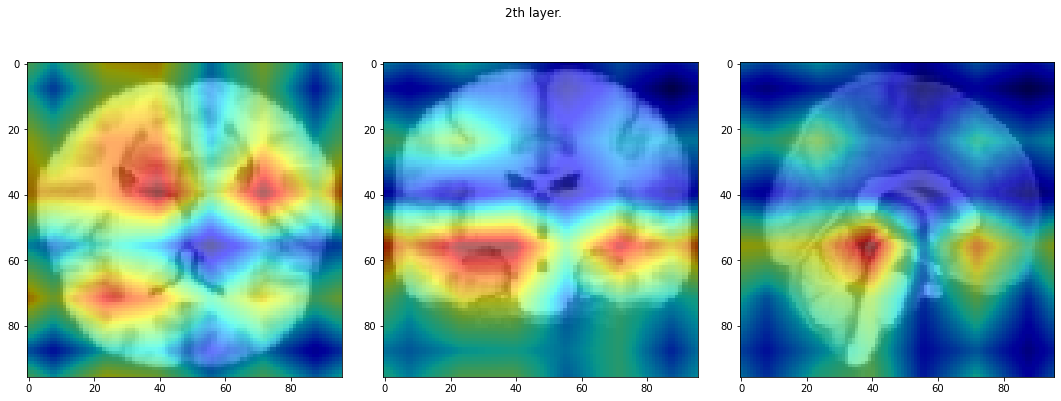

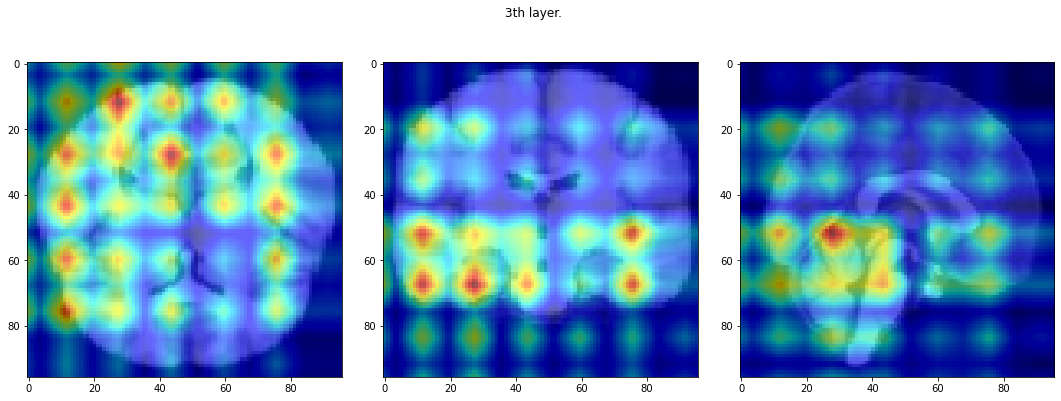

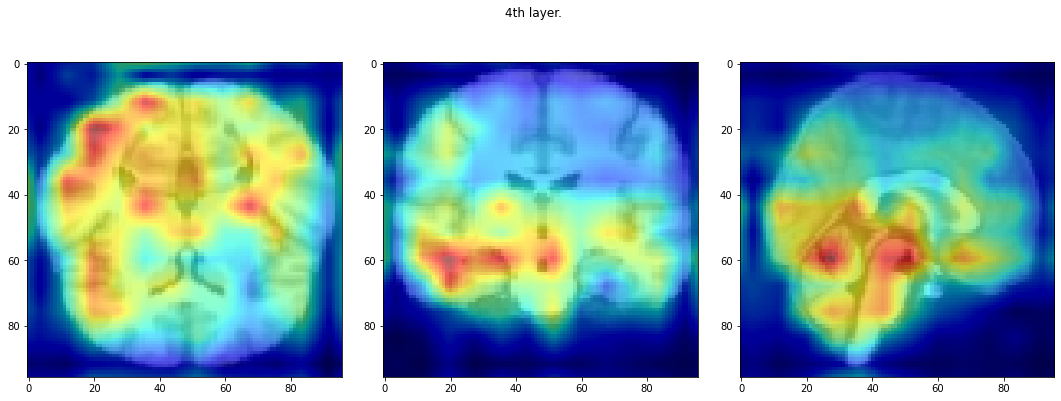

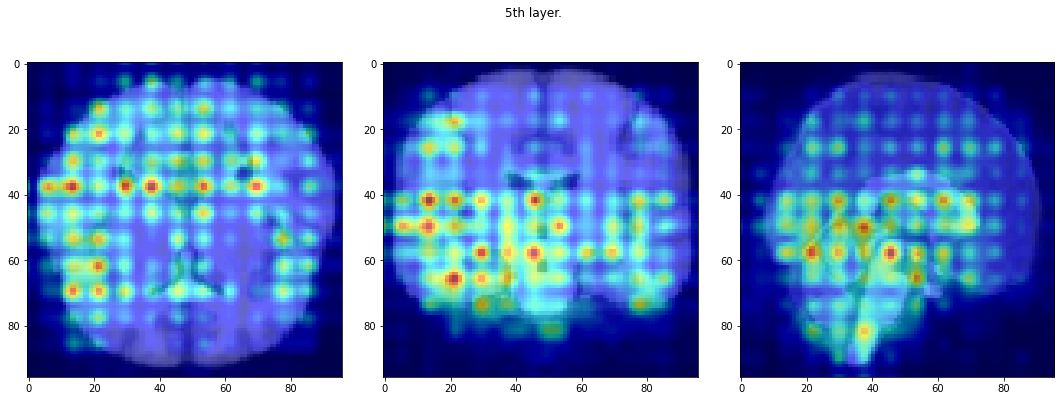

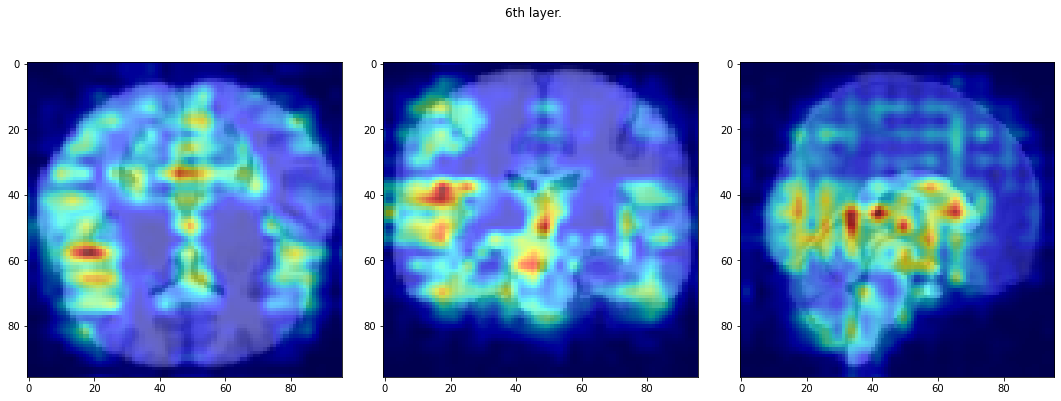

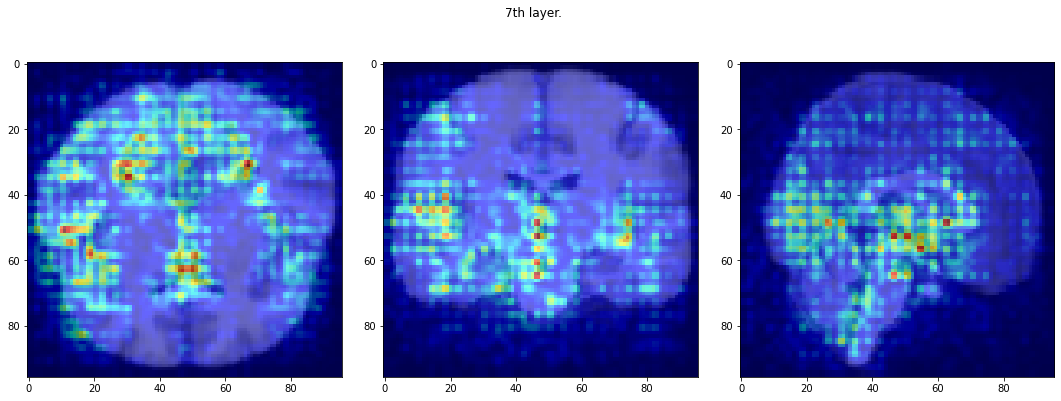

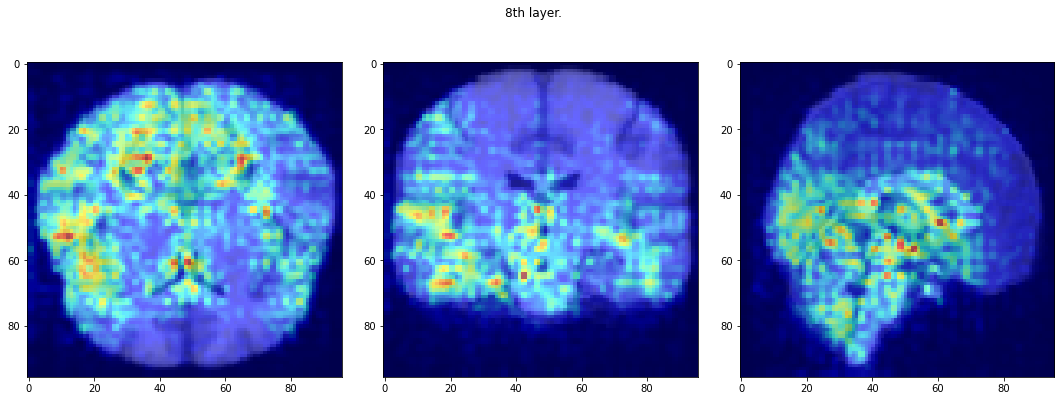

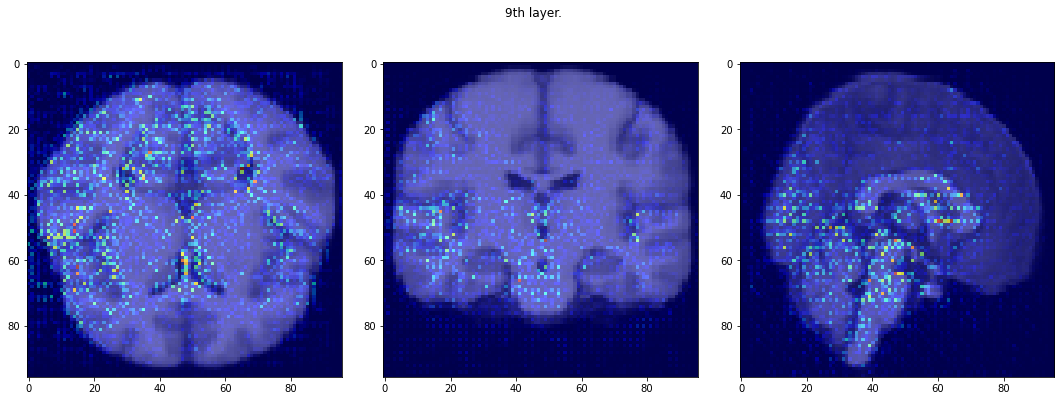

Weights successfully loaded!
Weights successfully loaded!
[true] 39 [pred] 13.023
[true] 43 [pred] 18.838
[true] 21 [pred] 21.119
[true] 35 [pred] 15.925
[true] 41 [pred] 8.416
[true] 30 [pred] 15.658
[true] 34 [pred] 15.834
[true] 41 [pred] 8.027
[true] 74 [pred] 34.407
[true] 28 [pred] 17.135
[true] 28 [pred] 20.794
[true] 30 [pred] 18.767
[true] 29 [pred] 25.674
[true] 55 [pred] 8.779
[true] 21 [pred] 19.202


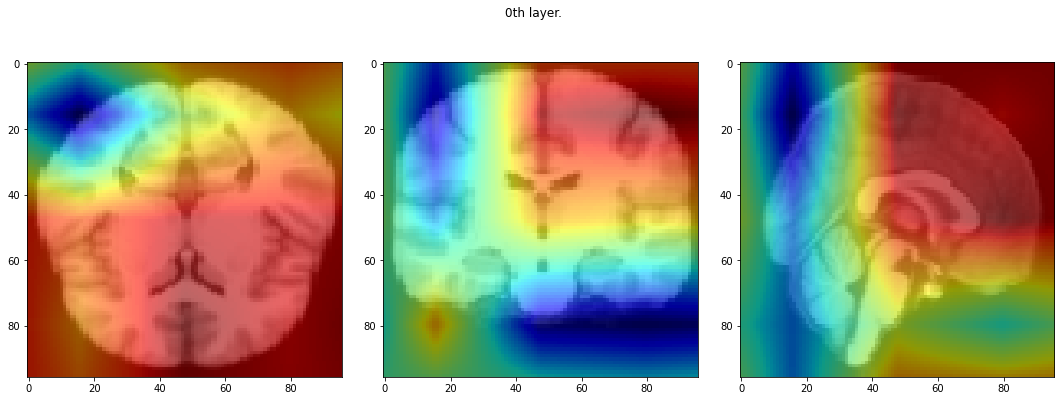

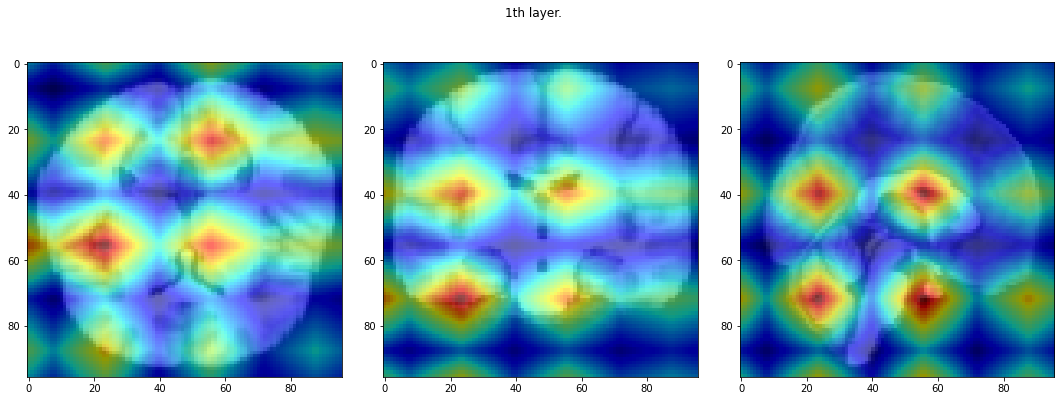

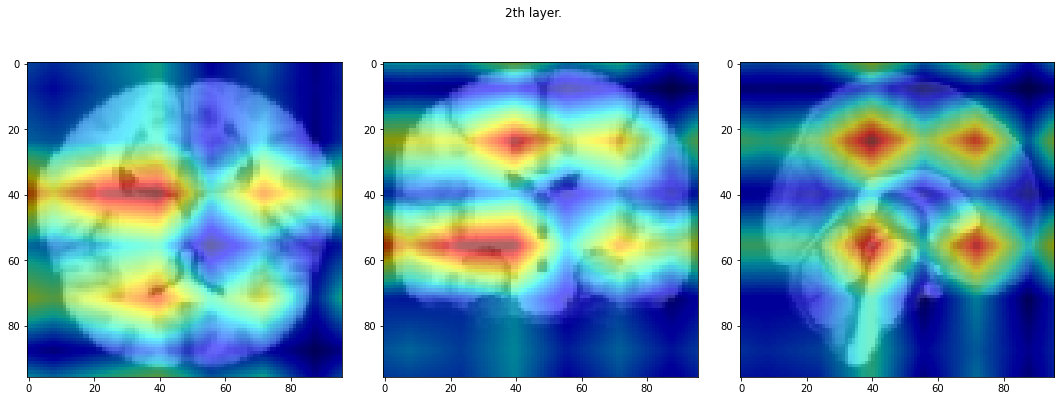

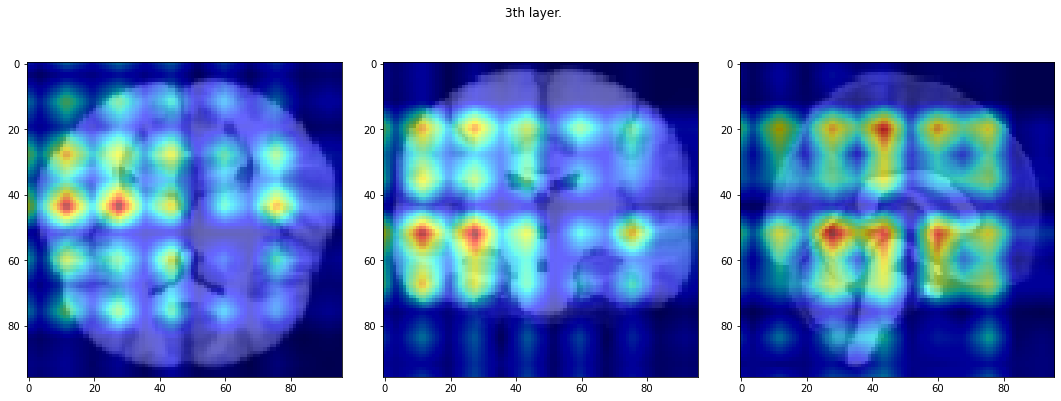

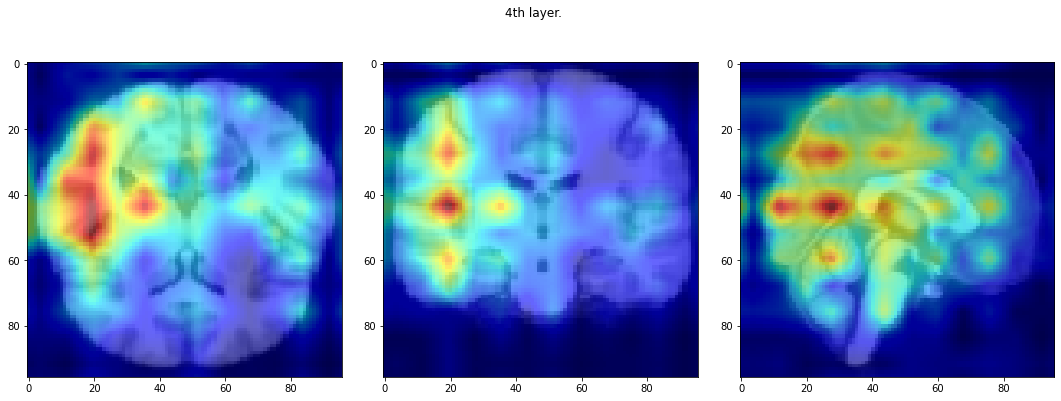

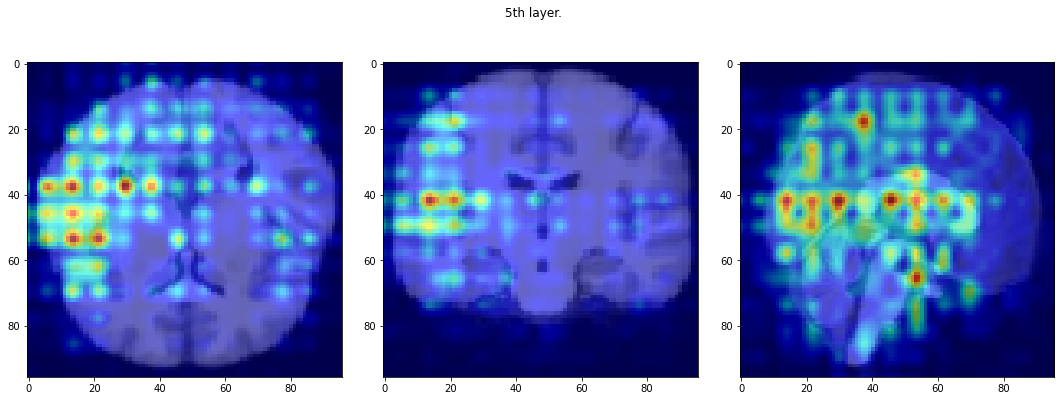

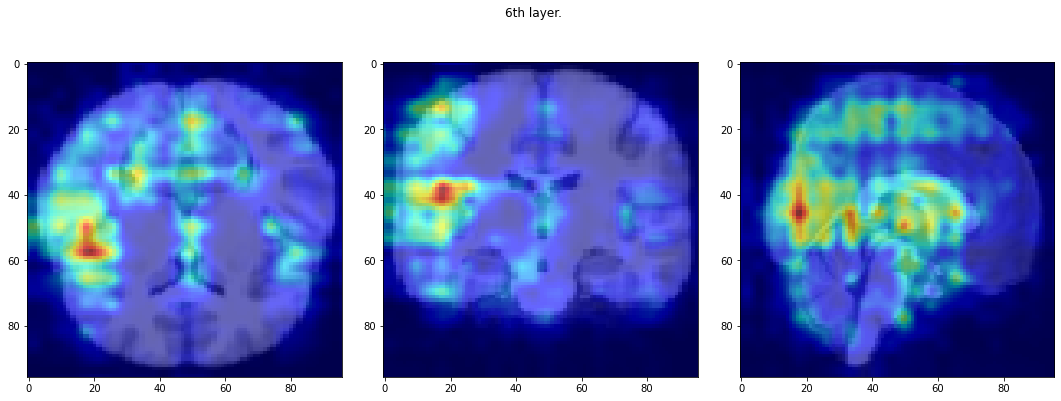

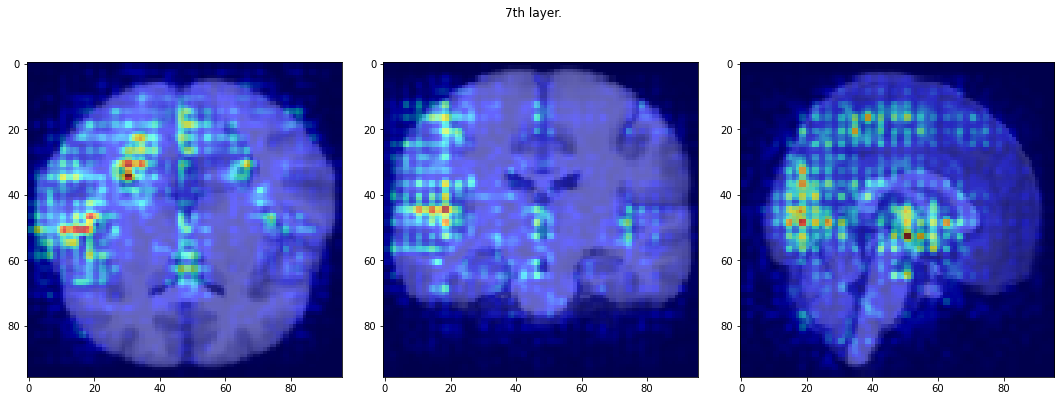

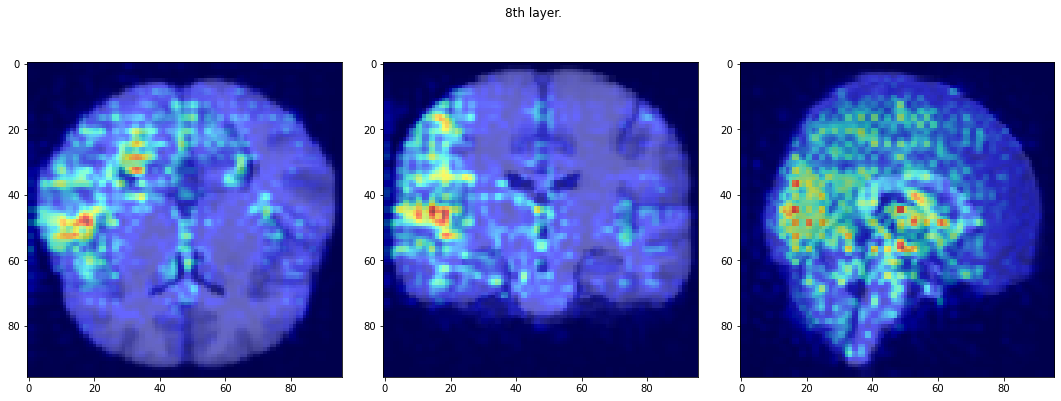

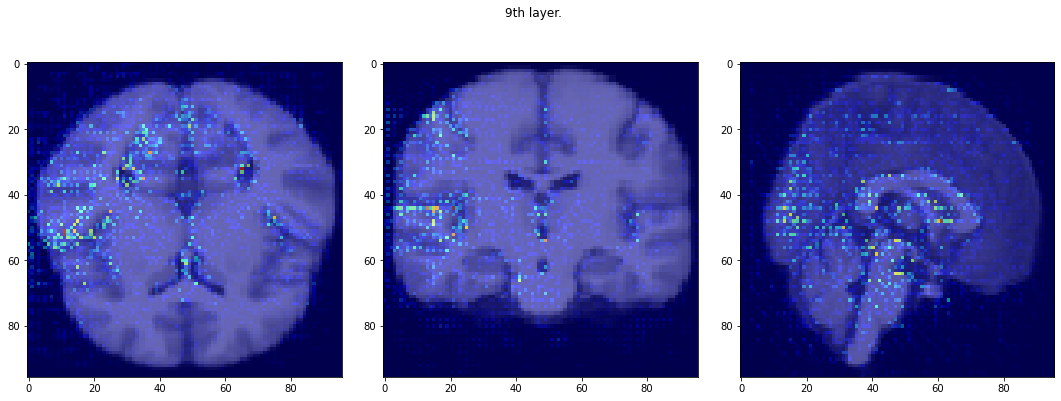

Weights successfully loaded!
Weights successfully loaded!
[true] 39 [pred] 19.036
[true] 43 [pred] 33.933
[true] 21 [pred] 24.311
[true] 35 [pred] 21.057
[true] 41 [pred] 23.891
[true] 30 [pred] 27.622
[true] 34 [pred] 25.716
[true] 41 [pred] 28.962
[true] 74 [pred] 85.030
[true] 28 [pred] 19.832
[true] 28 [pred] 29.923
[true] 30 [pred] 15.890
[true] 29 [pred] 43.195
[true] 55 [pred] 26.978
[true] 21 [pred] 18.764


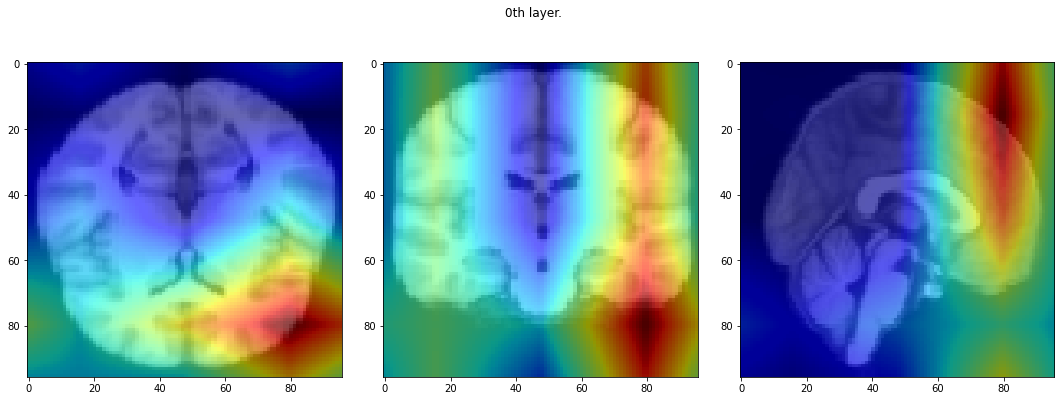

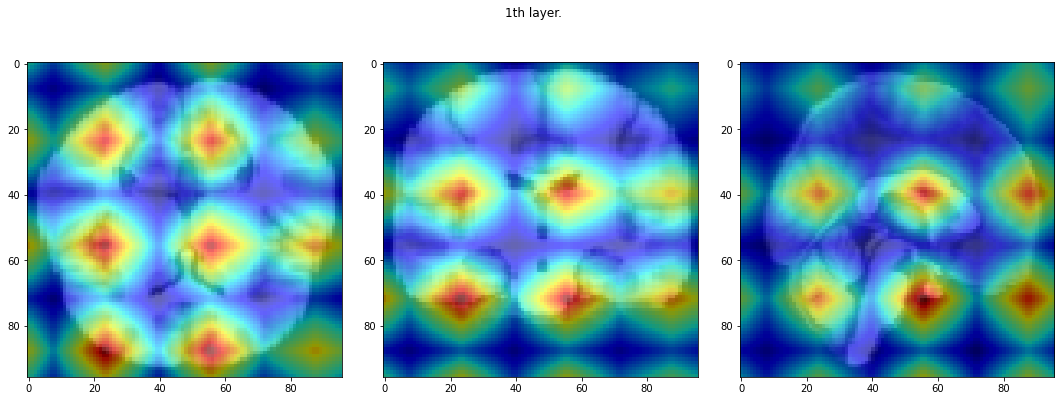

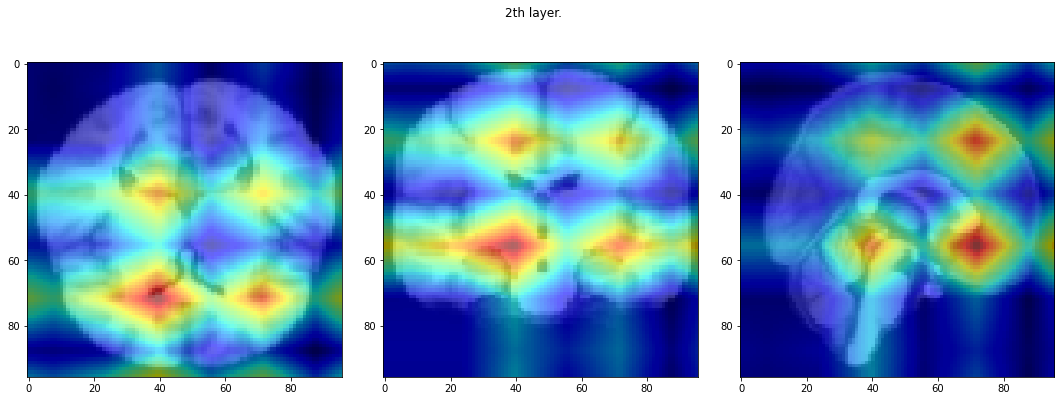

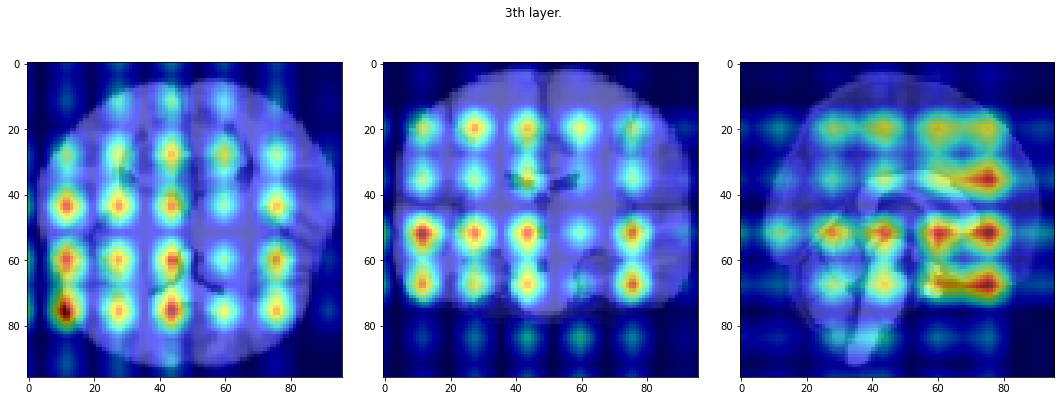

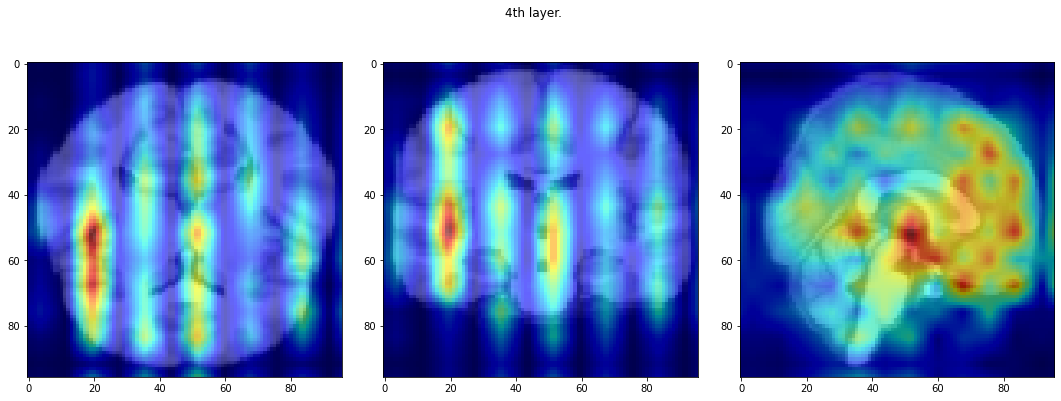

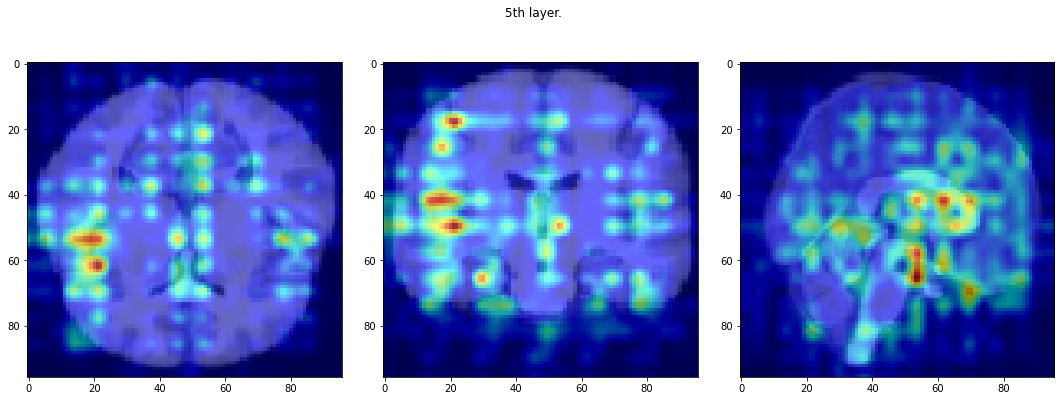

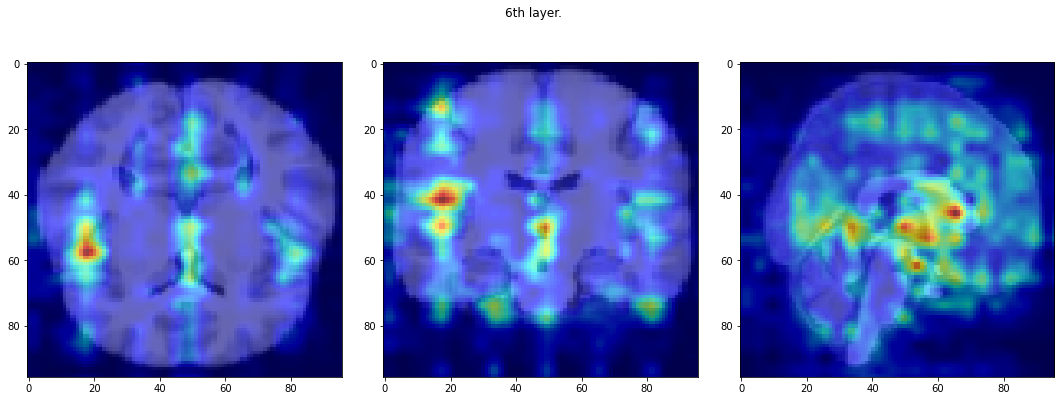

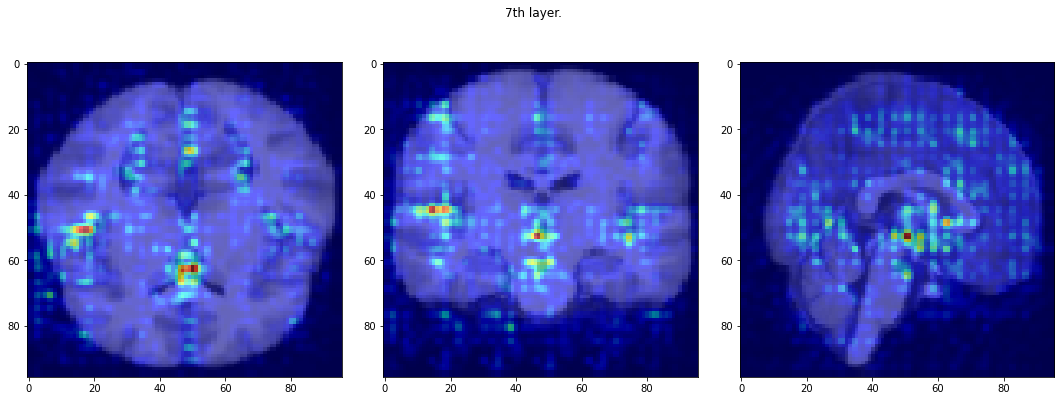

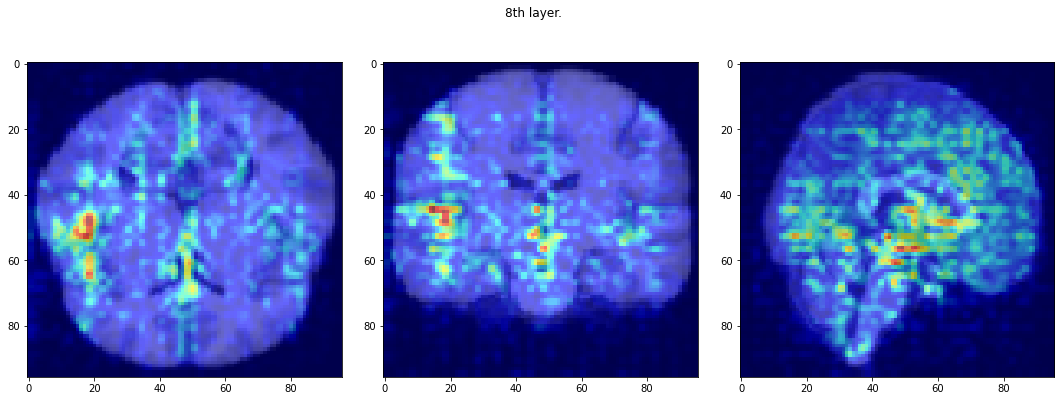

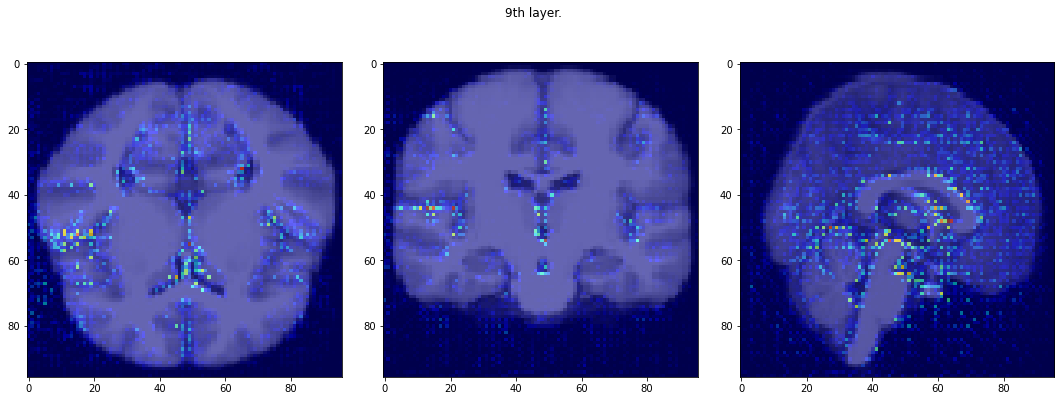

Weights successfully loaded!
Weights successfully loaded!
[true] 39 [pred] 29.047
[true] 43 [pred] 35.204
[true] 21 [pred] 21.462
[true] 35 [pred] 28.522
[true] 41 [pred] 31.270
[true] 30 [pred] 31.267
[true] 34 [pred] 36.312
[true] 41 [pred] 35.462
[true] 74 [pred] 69.468
[true] 28 [pred] 26.840
[true] 28 [pred] 28.381
[true] 30 [pred] 21.873
[true] 29 [pred] 28.232
[true] 55 [pred] 37.405
[true] 21 [pred] 22.653


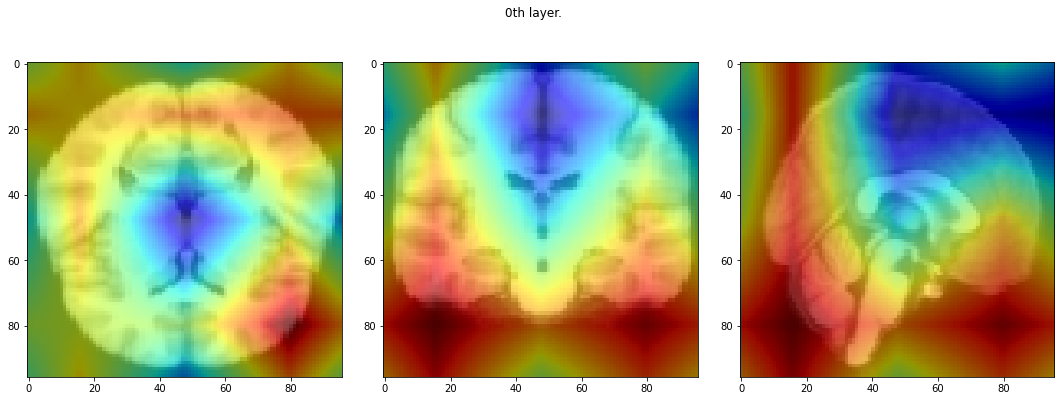

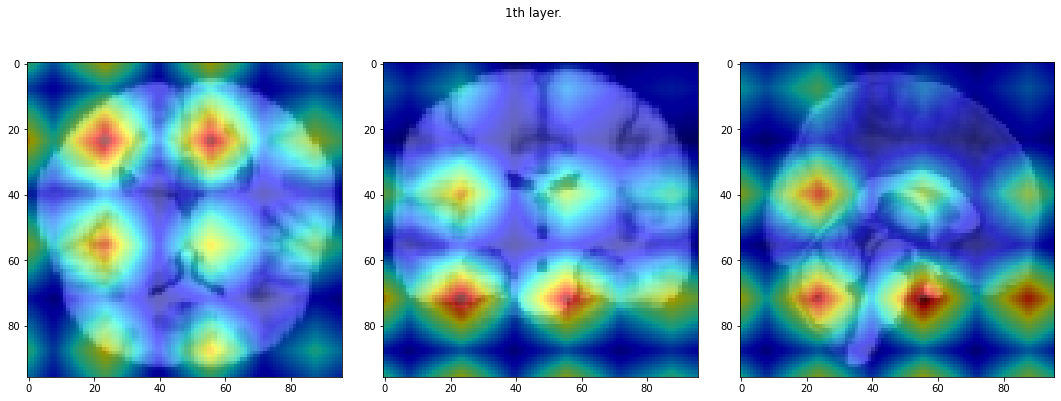

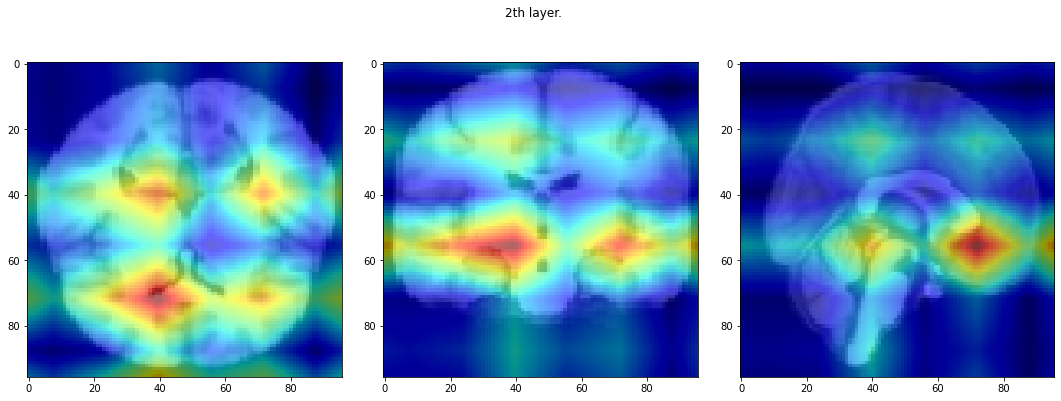

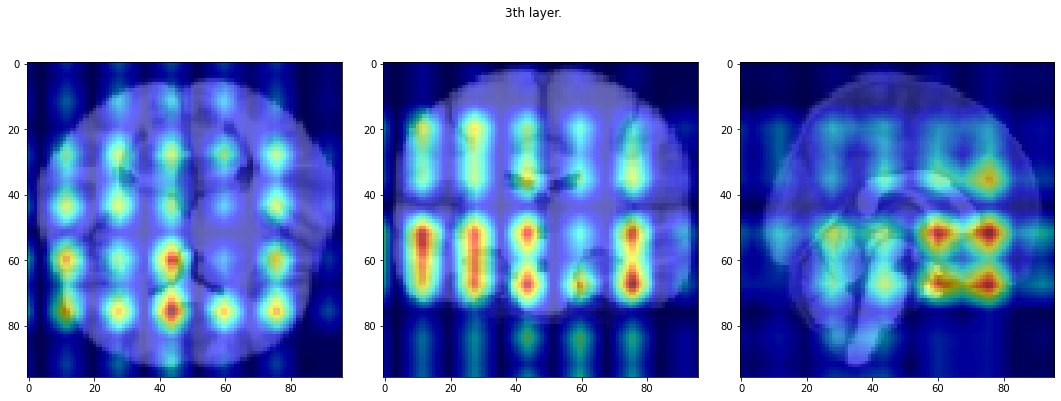

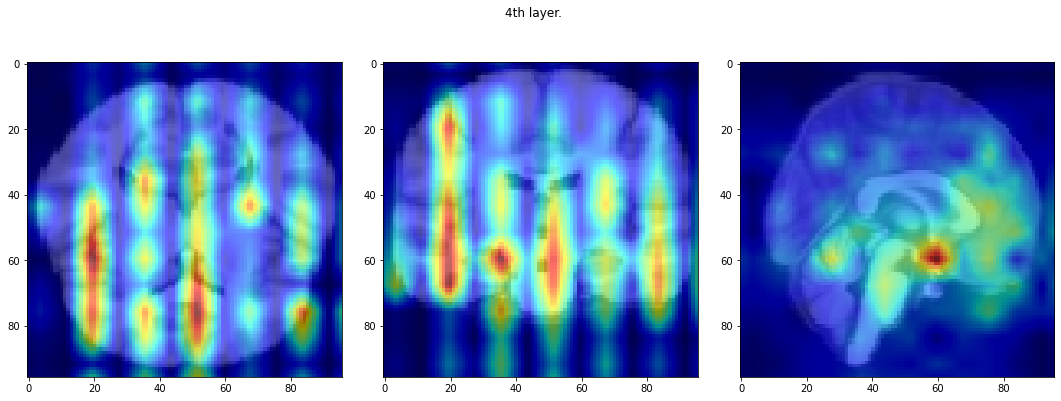

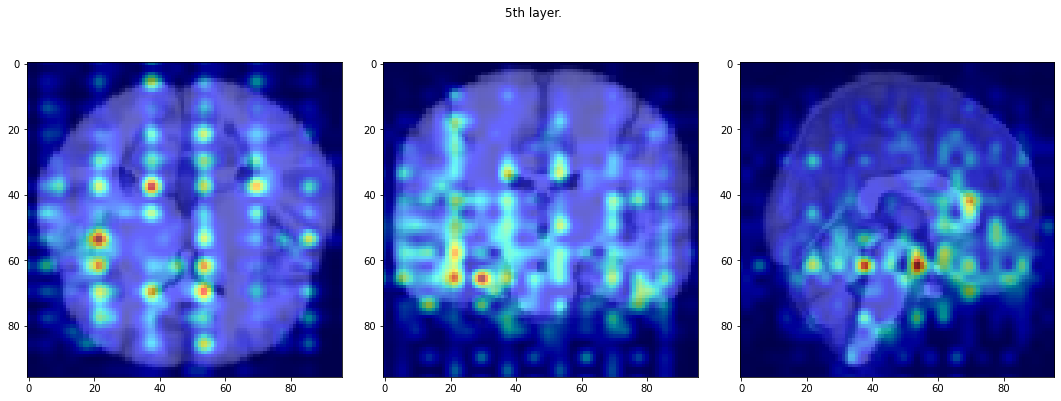

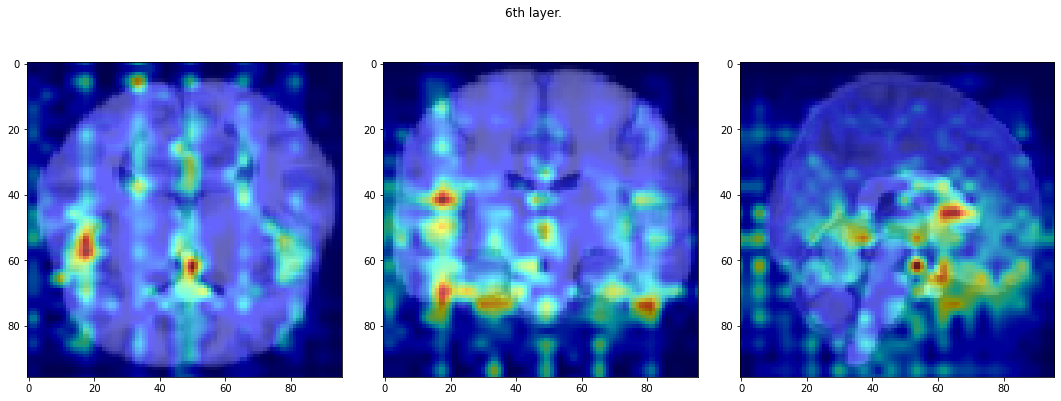

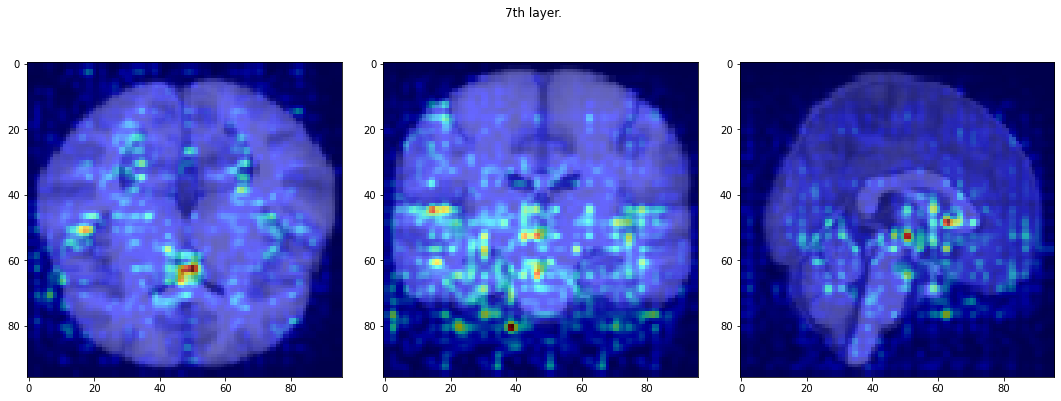

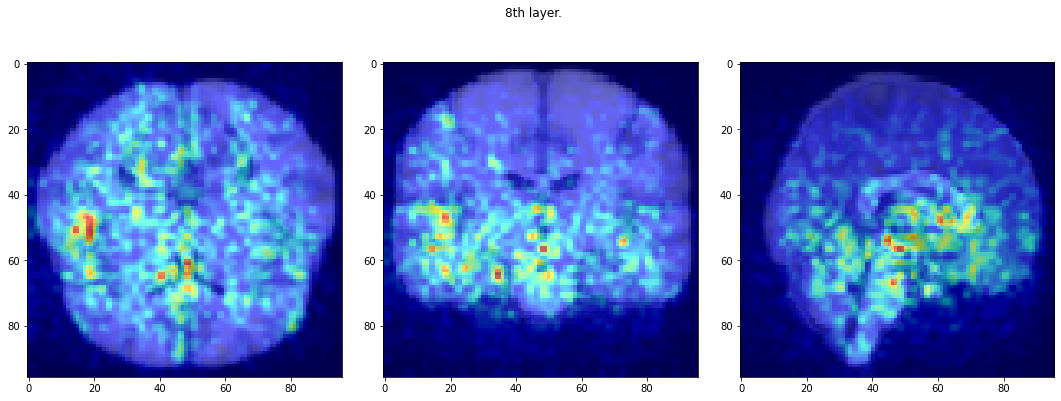

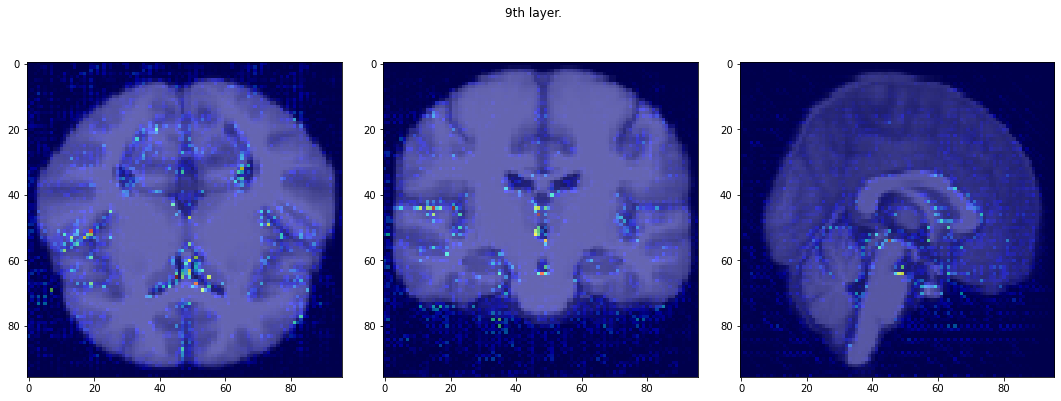

Weights successfully loaded!
Weights successfully loaded!
[true] 39 [pred] 44.492
[true] 43 [pred] 53.247
[true] 21 [pred] 39.219
[true] 35 [pred] 46.368
[true] 41 [pred] 46.115
[true] 30 [pred] 45.445
[true] 34 [pred] 44.845
[true] 41 [pred] 43.440
[true] 74 [pred] 78.665
[true] 28 [pred] 39.113
[true] 28 [pred] 39.709
[true] 30 [pred] 31.153
[true] 29 [pred] 52.314
[true] 55 [pred] 54.366


In [ ]:
vismap = gcam(dataloader=valid_dataloader, prefix=PREFIX, visualize=True)

In [12]:
class Nested:
    
    def __init__(self):
        
        pass
    
    def func1(self, x):
        
        def _run():
            print(x)
            
        _run()

In [13]:
nest = Nested()

In [14]:
nest.func1(3)

3
